# Mean-field simulations of fluctuation-driven rate chaos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import sys

from time_stats import xcov_conv_tri
from disp import set_plot

LOAD_DIR = '7A_rate_chaos_mft'

D = 200
K_OUT = 30
SGM_OUT = .2

N = np.inf

NTWK_SEED = 0
START_SEEDS = range(8)

T_MAX = 2000

D=200, K_OUT=30, SGM_OUT=0.2


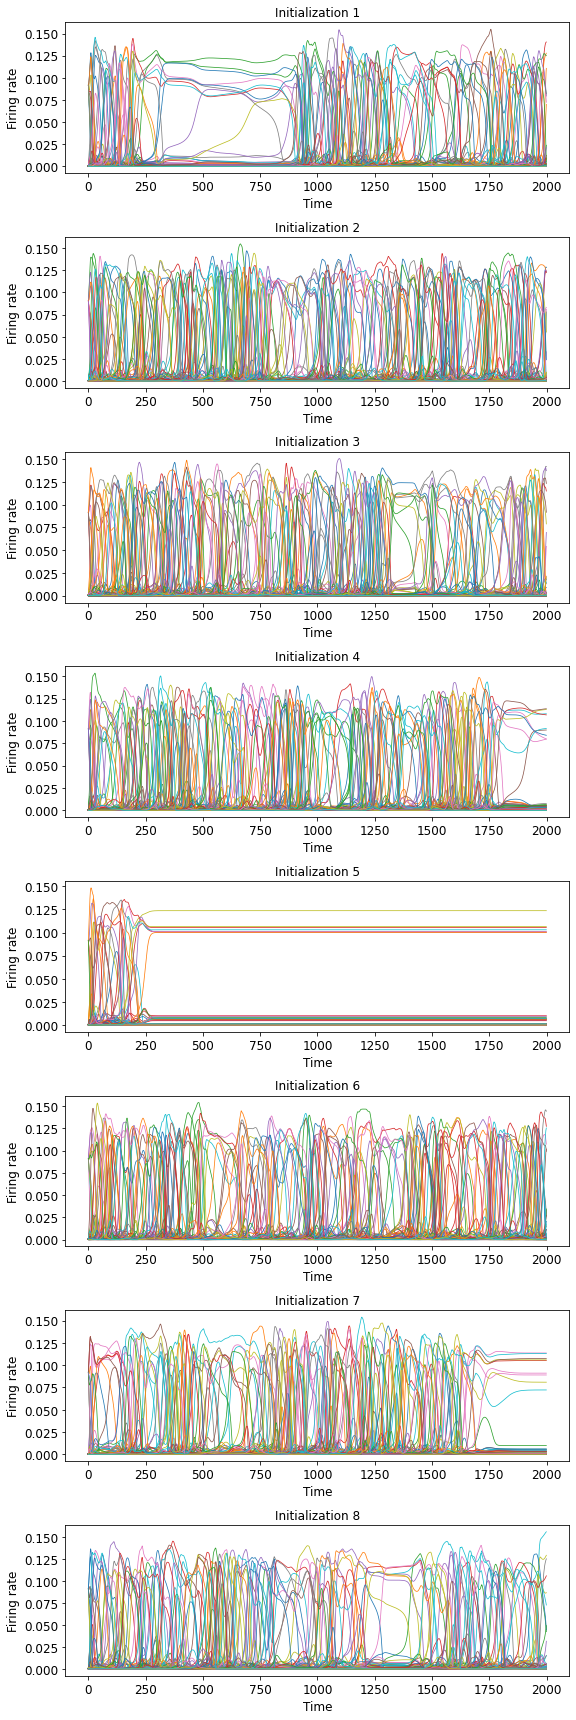

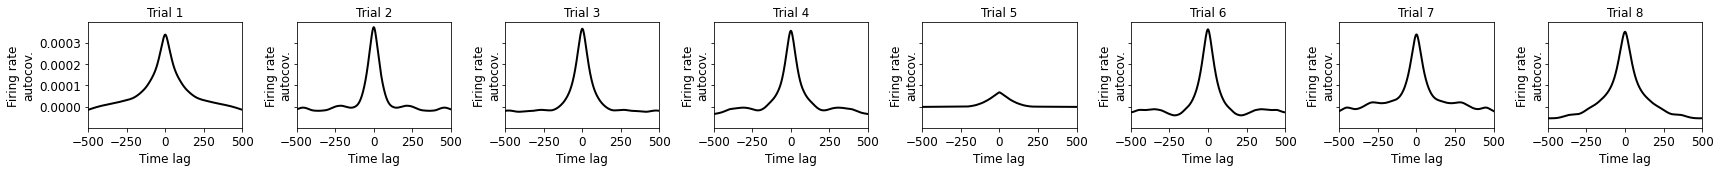

In [2]:
NTR = len(START_SEEDS)

print(f'D={D}, K_OUT={K_OUT}, SGM_OUT={SGM_OUT}')

fig, axs = plt.subplots(NTR, 1, figsize=(8, 3*NTR), tight_layout=True)
fig_acov, axs_acov = plt.subplots(1, NTR, figsize=(3*NTR, 2.5), sharey=True, tight_layout=True)

for ctr, START_SEED in enumerate(START_SEEDS):
    
    fload = f'mft' \
        + f'_D_{D}_K_OUT_{K_OUT}_SGM_OUT_{SGM_OUT}_N_{N}_T_MAX_{T_MAX}' \
        + f'_NTWK_SEED_{NTWK_SEED}_START_SEED_{START_SEED}.npy'

    data = np.load(os.path.join(LOAD_DIR, 'from_della', 'rate_chaos_mft', fload), allow_pickle=True)[0]
    
    t = data['t']
    ths = data['ths']
    
    axs[ctr].plot(t, ths, lw=.75)
    set_plot(axs[ctr], x_label='Time', y_label='Firing rate', title=f'Initialization {ctr+1}')
    
    # firing rate autocovs
    fr_acov_tcovs = [xcov_conv_tri(ths[:, d], ths[:, d]) for d in range(D)]
    fr_tcov = fr_acov_tcovs[0][1]
    fr_acov_mn = np.mean([fr_acov for fr_acov, fr_tcov in fr_acov_tcovs], axis=0)
    axs_acov[ctr].plot(fr_tcov, fr_acov_mn, lw=2, c='k')
        
    set_plot(axs_acov[ctr], x_lim=(-T_MAX/4, T_MAX/4), x_ticks=[-500, -250, 0, 250, 500], x_label='Time lag', y_label='Firing rate\nautocov.', title=f'Trial {ctr+1}')

In [4]:
fig.savefig('figs/main/8_rate_dynamics_examples_mft.svg')
fig_acov.savefig('figs/main/8_rate_acov_examples_mft.svg')